Online streaming platform buffering analysis

Dataset source: Kaggle

Dataset name  : Internet speed 2022

Objective:
To analyze how internet speed affect buffering behavior in online streaming platform using python and EDA


In [125]:
import pandas as pd
import matplotlib.pyplot as plt

In [126]:
import os
os.listdir("/content")

['.config', 'Internet Speed 2022.csv', '.ipynb_checkpoints', 'sample_data']

In [127]:
df = pd.read_csv("/content/Internet Speed 2022.csv")
df.head()



,country,broadband,mobile
0,Monaco,261.82,NaN
1,Singapore,255.83,105.01
2,Hong Kong,254.70,83.58
3,Romania,232.17,59.67
4,Switzerland,229.96,135.70


In [128]:
df

,country,broadband,mobile
0,Monaco,261.82,NaN
1,Singapore,255.83,105.01
2,Hong Kong,254.70,83.58
3,Romania,232.17,59.67
4,Switzerland,229.96,135.70
...,...,...,...
172,Equatorial Guinea,7.95,NaN
173,Sudan,7.92,14.51
174,Yemen,7.59,NaN
175,Turkmenistan,4.11,NaN


In [129]:
df.tail()

,country,broadband,mobile
172,Equatorial Guinea,7.95,NaN
173,Sudan,7.92,14.51
174,Yemen,7.59,NaN
175,Turkmenistan,4.11,NaN
176,Cuba,4.01,25.02


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    177 non-null    object 
 1   broadband  177 non-null    float64
 2   mobile     136 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.3+ KB


In [131]:
df.describe()

,broadband,mobile
count,177.000000,136.000000
mean,72.672825,53.788235
std,66.461751,43.327121
min,4.010000,7.270000
25%,22.500000,24.402500
50%,43.480000,35.825000
75%,109.410000,69.205000
max,261.820000,238.060000


This dataset contain internet speed information.
the average downlod speed can be observed using the mean value.

In [132]:
df['buffering_time']=100/df['broadband']

In [133]:
df[['broadband','mobile','buffering_time']].head()

,broadband,mobile,buffering_time
0,261.82,NaN,0.381942
1,255.83,105.01,0.390885
2,254.70,83.58,0.392619
3,232.17,59.67,0.430719
4,229.96,135.70,0.434858


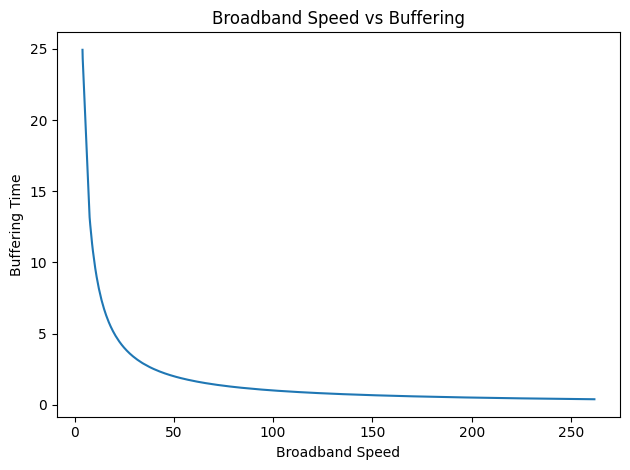

In [134]:
plt.plot(df['broadband'], df['buffering_time'])
plt.xlabel("Broadband Speed")
plt.ylabel("Buffering Time")
plt.title("Broadband Speed vs Buffering")
plt.tight_layout()
plt.show()


**Top 10 countries with the most buffering issues generally have the slowest average internet speed**

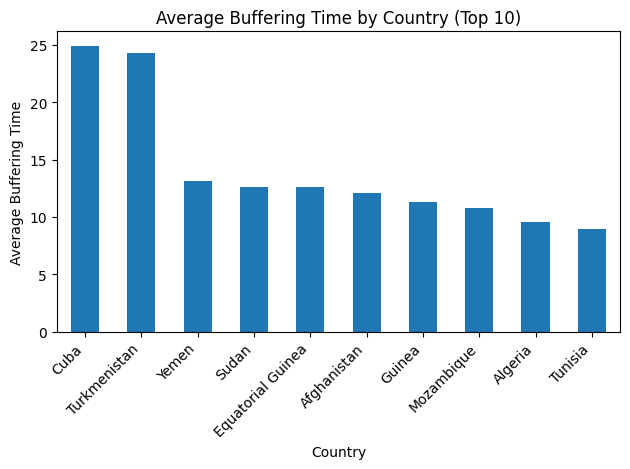

In [135]:
df.groupby('country')['buffering_time'] \
    .mean() \
    .sort_values(ascending=False) \
    .head(10) \
    .plot(kind='bar')

plt.xlabel("Country")
plt.ylabel("Average Buffering Time")
plt.title("Average Buffering Time by Country (Top 10)")

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


**Top 10 countries with the least buffering issues generally have the fastest average internet speed**

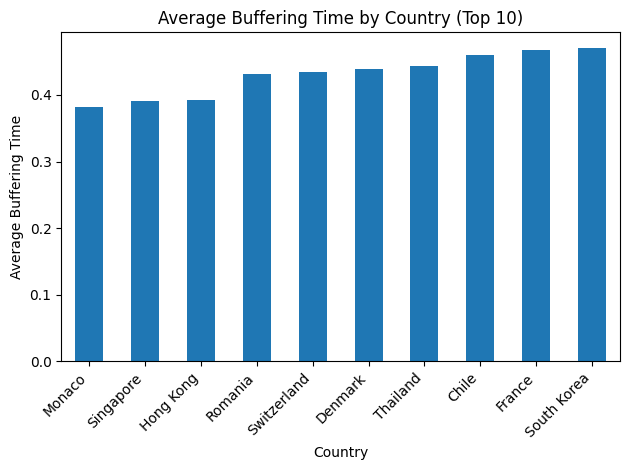

In [136]:
df.groupby('country')['buffering_time'] \
  .mean() \
  .sort_values(ascending=True) \
  .head(10) \
  .plot(kind='bar')

plt.xlabel("Country")
plt.ylabel("Average Buffering Time")
plt.title("Average Buffering Time by Country (Top 10)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()